In [1]:
!pip install kaggle



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import shutil


os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)


shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))


os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
# Verify that kaggle.json is in the correct location
os.listdir(os.path.expanduser("~/.kaggle"))



['kaggle.json']

In [6]:
!kaggle datasets download -d puneet6060/intel-image-classification



Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [284]:
import zipfile


with zipfile.ZipFile("intel-image-classification.zip", "r") as zip_ref:
    zip_ref.extractall("intel_image_classification")


Class Names:
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Sample Images from Each Class:
Class: buildings


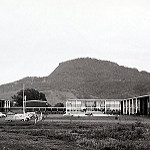

Class: forest


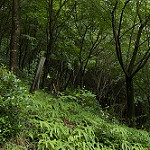

Class: glacier


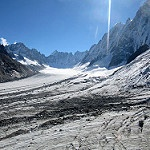

Class: mountain


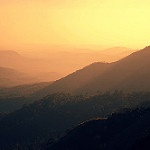

Class: sea


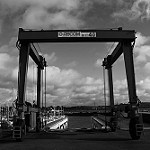

Class: street


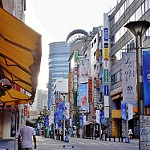

In [288]:
import os
from PIL import Image




base_dir = 'intel_image_classification/seg_train/seg_train'


CLASS_NAMES= os.listdir(base_dir)
CLASS_NAMES = [name for name in class_names if os.path.isdir(os.path.join(base_dir, name))]

print("Class Names:")
print(CLASS_NAMES)

print("\nSample Images from Each Class:")

for class_name in CLASS_NAMES:
    class_dir = os.path.join(base_dir, class_name)
    
    # List all image files in the class directory
    image_files = os.listdir(class_dir)
    image_path = os.path.join(class_dir, sample_image)
    
    if image_files:  # Check if there are any images
        sample_image = image_files[0]  # Get the first image file
        image_path = os.path.join(class_dir, sample_image)
        print(f"Class: {class_name}")
        image = Image.open(image_path)
        display(image)


In [23]:
!pip install pillow



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install tensorflow




[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [300]:
print(CLASS_NAMES)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [171]:
import tensorflow as tf

def normalize(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize image to [0, 1]
    return image, label


dataset_dir = 'intel_image_classification/seg_train/seg_train'


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=(150, 150),
    color_mode='rgb',
    shuffle=True,
    labels='inferred',
    seed=1234,
    validation_split=0.2,  
    subset='training',     
    label_mode='int',
    batch_size=32
)


train_dataset = train_dataset.map(normalize)


validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=(150, 150),
    color_mode='rgb',
    shuffle=True,
    labels='inferred',
    seed=1234,
    validation_split=0.2, 
    subset='validation',   
    label_mode='int',
    batch_size=32
)


validation_dataset = validation_dataset.map(normalize)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [173]:
import tensorflow as tf
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_dataset_dir = 'intel_image_classification/seg_test/seg_test'

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_dir,
    image_size=(150, 150),
    color_mode='rgb',
    shuffle=True,
    labels='inferred',
    seed=1234,
    label_mode='int',
    batch_size=32
)
test_dataset = test_dataset.map(normalize)



Found 3000 files belonging to 6 classes.


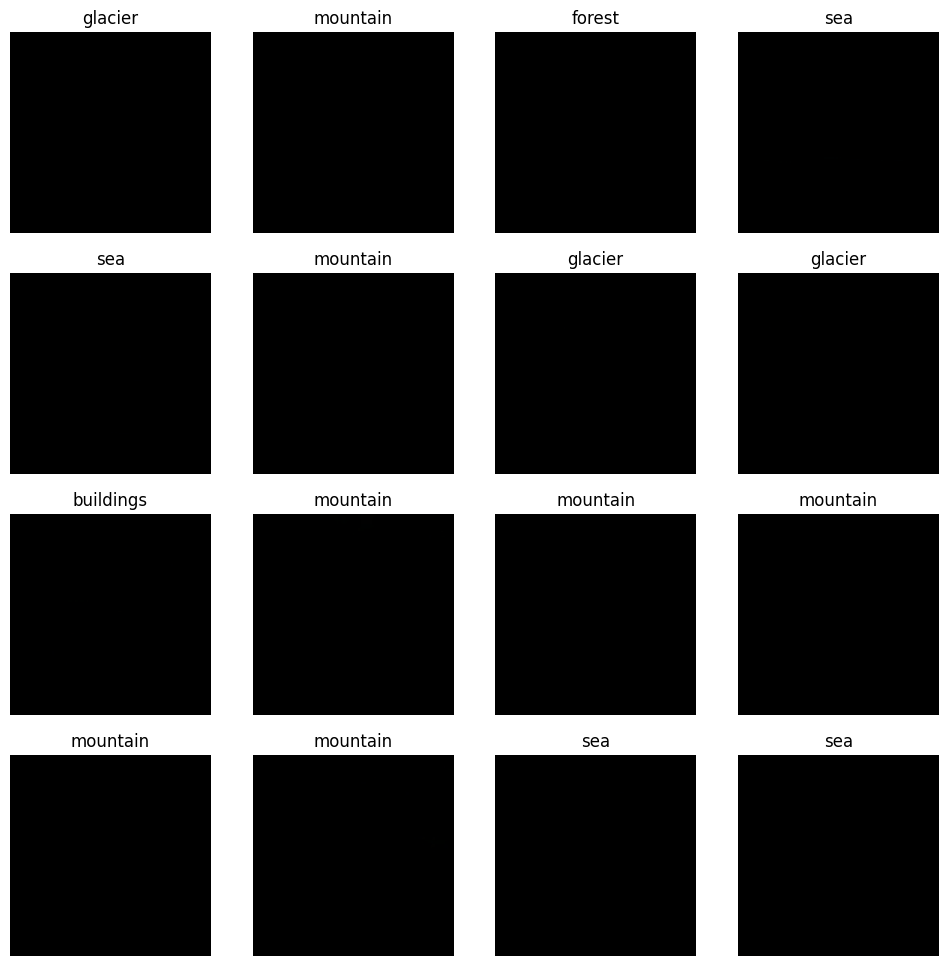

In [185]:
import matplotlib.pyplot as plt
import tensorflow as tf


def display_batch(image_batch, label_batch, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(16):  # Display 9 images
        
        plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis('off')
    plt.show()


for image_batch, label_batch in train_dataset.take(1):
    display_batch(image_batch, label_batch, dataset.class_names)


In [177]:
# Check the pixel value range
for images, _ in validation_dataset.take(1):
    print("Min pixel value:", tf.reduce_min(images).numpy())
    print("Max pixel value:", tf.reduce_max(images).numpy())

Min pixel value: 0.0
Max pixel value: 1.0


2.1: First model

In [236]:




import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


num_classes = len(CLASS_NAMES)  


model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),        
    layers.Dense(num_classes, activation='softmax') 
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)


history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20, 
    callbacks=[early_stopping]
)


Epoch 1/20
351/351 [==============================] - 11s 31ms/step - loss: 5.4549 - accuracy: 0.3697 - val_loss: 2.2921 - val_accuracy: 0.5157
Epoch 2/20
351/351 [==============================] - 13s 36ms/step - loss: 3.7960 - accuracy: 0.4254 - val_loss: 5.7180 - val_accuracy: 0.3781
Epoch 3/20
351/351 [==============================] - 13s 38ms/step - loss: 3.4036 - accuracy: 0.4582 - val_loss: 4.7894 - val_accuracy: 0.3571
Epoch 4/20
351/351 [==============================] - 14s 38ms/step - loss: 3.0720 - accuracy: 0.4869 - val_loss: 2.5616 - val_accuracy: 0.4555


In [189]:
print(history)

In [191]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

94/94 [==============================] - 5s 53ms/step - loss: 2.5251 - accuracy: 0.5053
Test Accuracy: 0.51


2.2: 2nd model

In [206]:
!pip install keras-tuner



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [229]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras_tuner as kt
num_classes = len(CLASS_NAMES)  

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(150, 150, 3)))  # Input layer

    # Add tunable number of hidden layers (between 4 and 5)
    for i in range(hp.Int('num_hidden_layers', 4, 5)):
        model.add(layers.Dense(
            units=hp.Choice(f'units_{i}', [64, 128, 256]),  # Number of units in the layer
            activation='relu'
        ))
        # Add the first dropout layer after the 2nd hidden layer
        if i == 1:
            model.add(layers.Dropout(rate=hp.Choice('dropout_rate_1', [0.2, 0.5])))

    # Add the second dropout layer just before the final output layer
    model.add(layers.Dropout(rate=hp.Choice('dropout_rate_2', [0.2, 0.5])))

    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')  # Tuning learning rate
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [232]:
# Import necessary modules
import keras_tuner as kt
import tensorflow as tf

# Define the RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of different models to try
    executions_per_trial=1,  # Number of executions for each trial
    directory='my_dir',
    project_name='fixed_architecture_randomsearch'
)

# Define early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Perform the hyperparameter search
tuner.search(
    train_dataset,  # Your training dataset
    validation_data=validation_dataset,  # Your validation dataset
    epochs=8,  # Number of epochs to train during search
    callbacks=[early_stopping]
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Dropout rate 1: {best_hps.get('dropout_rate_1')}")
print(f"Dropout rate 2: {best_hps.get('dropout_rate_2')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")


Trial 5 Complete [00h 02m 12s]
val_accuracy: 0.1803278625011444

Best val_accuracy So Far: 0.4953670799732208
Total elapsed time: 00h 19m 05s
Best Hyperparameters:
Dropout rate 1: 0.2
Dropout rate 2: 0.2
Learning rate: 0.001662632679170896


In [233]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_dataset)

94/94 [==============================] - 7s 65ms/step - loss: 1.3487 - accuracy: 0.4833


Epoch 1/20
351/351 [==============================] - 34s 95ms/step - loss: 1.3329 - accuracy: 0.4725 - val_loss: 1.3169 - val_accuracy: 0.4954
Epoch 2/20
351/351 [==============================] - 33s 93ms/step - loss: 1.2853 - accuracy: 0.4996 - val_loss: 1.4404 - val_accuracy: 0.4490
Epoch 3/20
351/351 [==============================] - 33s 94ms/step - loss: 1.2829 - accuracy: 0.4942 - val_loss: 1.3640 - val_accuracy: 0.4544
Epoch 4/20
351/351 [==============================] - 33s 93ms/step - loss: 1.2693 - accuracy: 0.5083 - val_loss: 1.3256 - val_accuracy: 0.4939


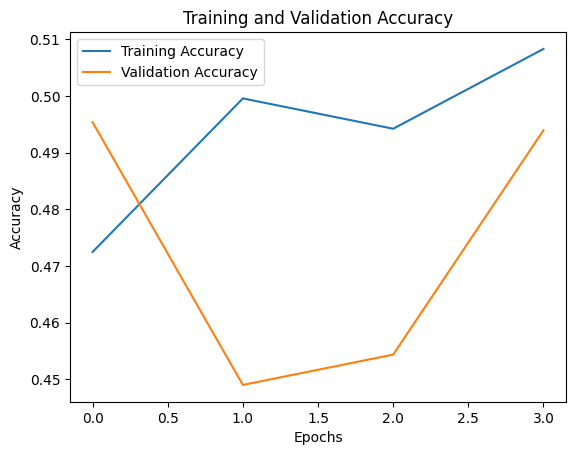

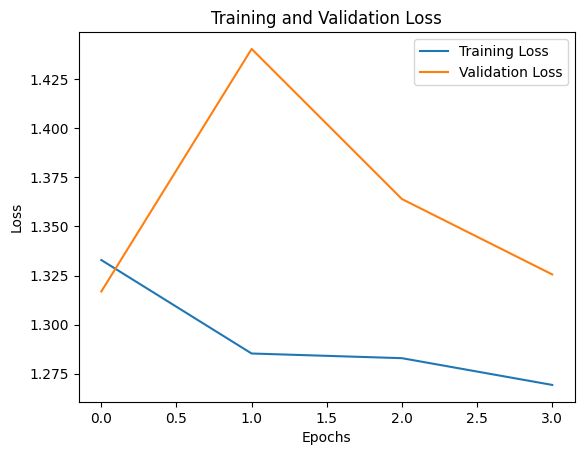

In [235]:
# Perform the hyperparameter search
tuner.search(
    train_dataset,  # Use the train dataset
    validation_data=validation_dataset,  # Use the validation dataset
    epochs=20,
    callbacks=[early_stopping]
)

# Get the best model and its history
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# You need to re-train the best model to obtain the training history
history1 = best_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stopping]
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
351/351 [==============================] - 11s 31ms/step - loss: 4.3260 - accuracy: 0.4160 - val_loss: 3.4705 - val_accuracy: 0.4537
Epoch 2/20
351/351 [==============================] - 12s 33ms/step - loss: 3.7180 - accuracy: 0.4524 - val_loss: 3.0704 - val_accuracy: 0.4120
Epoch 3/20
351/351 [==============================] - 12s 33ms/step - loss: 3.1068 - accuracy: 0.4874 - val_loss: 3.3721 - val_accuracy: 0.4202
Epoch 4/20
351/351 [==============================] - 12s 33ms/step - loss: 3.2589 - accuracy: 0.4912 - val_loss: 2.8684 - val_accuracy: 0.4312
Epoch 5/20
351/351 [==============================] - 12s 33ms/step - loss: 2.8886 - accuracy: 0.5134 - val_loss: 3.7305 - val_accuracy: 0.4066
Epoch 6/20
351/351 [==============================] - 14s 38ms/step - loss: 2.6950 - accuracy: 0.5372 - val_loss: 5.8081 - val_accuracy: 0.3314
Epoch 7/20
351/351 [==============================] - 11s 32ms/step - loss: 2.7102 - accuracy: 0.5552 - val_loss: 5.8110 - val_accuracy:

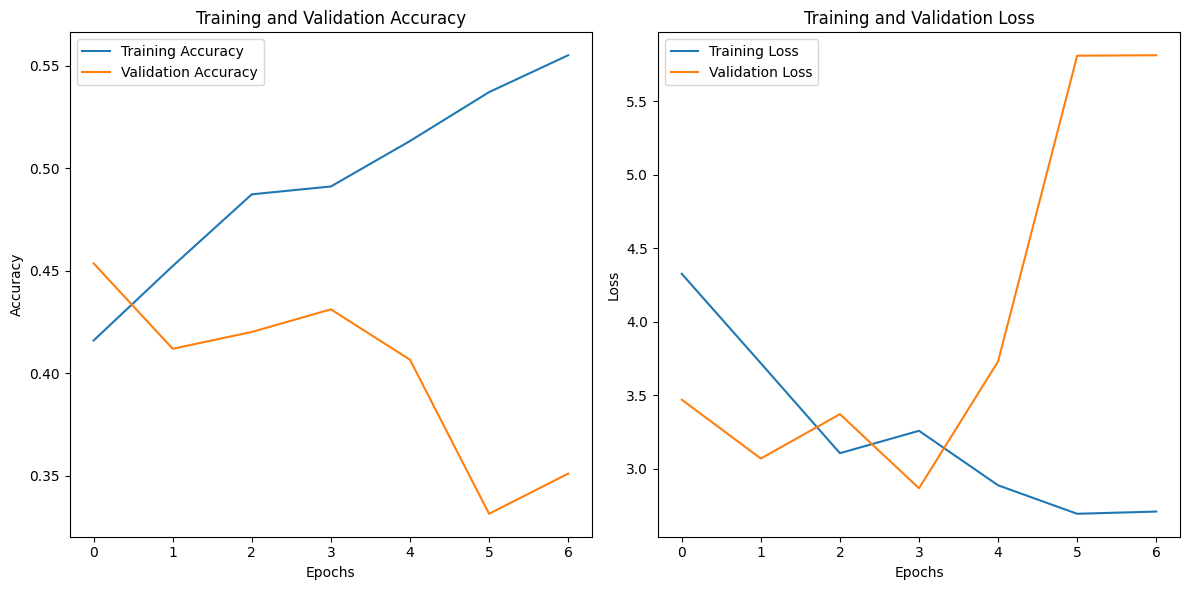

In [237]:
import matplotlib.pyplot as plt

# Assuming `history` is obtained from model.fit()
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20, 
    callbacks=[early_stopping]
)

# Plot accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


2.3
1) model 1 (2.1) had higher accuracy of 51 percent whereas model 2 (2.2) had a accuracy of 48,3
2) model 1 had an higher level of overfitting as we can see that for model 1, training and test accuracies had difference such that test accuracies kept decreasing and and training accuracy kept increasing overtime


TASK 3

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Define the model
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2), strides=None))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=(2, 2), strides=None))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=(2, 2), strides=None))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=(2, 2), strides=None))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=(2, 2), strides=None))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.50))

model3.add(Dense(6, activation='softmax'))



In [248]:
model3.compile(optimizer="adam", loss= "sparse_categorical_crossentropy", metrics=["accuracy"])

In [249]:
# Assuming train_dataset and validation_dataset are your TensorFlow datasets

history3 = model3.fit(
    train_dataset,             # Training dataset
    epochs=15,                 # Number of epochs
    verbose=1,                 # Verbosity mode
    validation_data=validation_dataset,  # Validation dataset
    batch_size=32,             # Batch size (not needed if using TensorFlow datasets)
    
)


Epoch 1/15
351/351 [==============================] - 163s 464ms/step - loss: 1.0690 - accuracy: 0.5743 - val_loss: 0.8249 - val_accuracy: 0.6875
Epoch 2/15
351/351 [==============================] - 160s 455ms/step - loss: 0.7373 - accuracy: 0.7273 - val_loss: 0.5940 - val_accuracy: 0.7865
Epoch 3/15
351/351 [==============================] - 160s 456ms/step - loss: 0.6060 - accuracy: 0.7830 - val_loss: 0.5626 - val_accuracy: 0.7990
Epoch 4/15
351/351 [==============================] - 176s 502ms/step - loss: 0.5004 - accuracy: 0.8218 - val_loss: 0.4597 - val_accuracy: 0.8471
Epoch 5/15
351/351 [==============================] - 194s 553ms/step - loss: 0.4311 - accuracy: 0.8499 - val_loss: 0.4393 - val_accuracy: 0.8482
Epoch 6/15
351/351 [==============================] - 161s 459ms/step - loss: 0.3881 - accuracy: 0.8623 - val_loss: 0.4641 - val_accuracy: 0.8471
Epoch 7/15
351/351 [==============================] - 155s 441ms/step - loss: 0.3469 - accuracy: 0.8774 - val_loss: 0.4665 -

In [250]:
test_loss, test_accuracy = model3.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


94/94 [==============================] - 14s 143ms/step - loss: 0.7711 - accuracy: 0.8370
Test Loss: 0.7711
Test Accuracy: 0.8370


In [304]:
import numpy as np

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model3.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 [==============================] - 0s 241ms/step


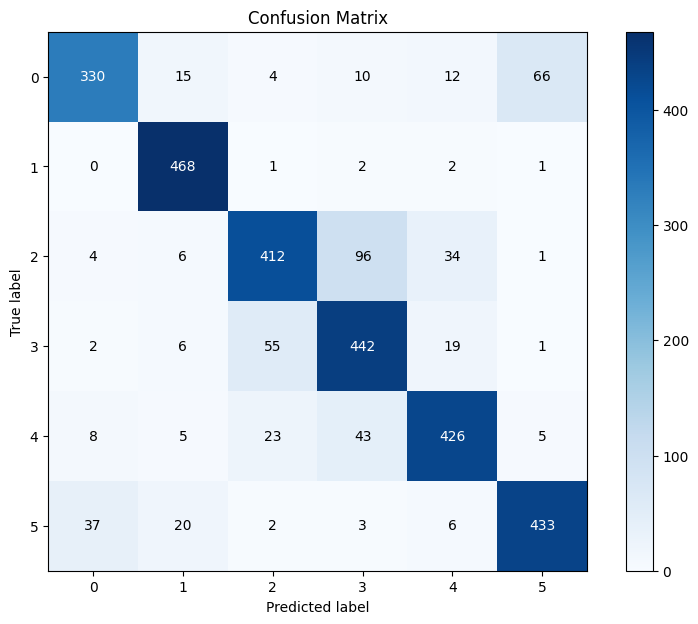

In [306]:
import tensorflow as tf

# Compute confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=6)

# Convert to a numpy array for visualization
cm = cm.numpy()

# Plot the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.arange(6)  # Adjust based on your number of classes
plt.xticks(ticks=classes, labels=classes)
plt.yticks(ticks=classes, labels=classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], 
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [303]:
# Calculate misclassifications per class
misclassifications = np.zeros_like(cm)
for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        misclassifications[y_true[i], y_pred[i]] += 1

# Find the class with the most errors
most_common_error_class = np.argmax(np.sum(misclassifications, axis=1))
print(f"Most common classification error is for class: {dataset.class_names[most_common_error_class]}")


Most common classification error is for class: glacier


1/1 [==============================] - 0s 275ms/step


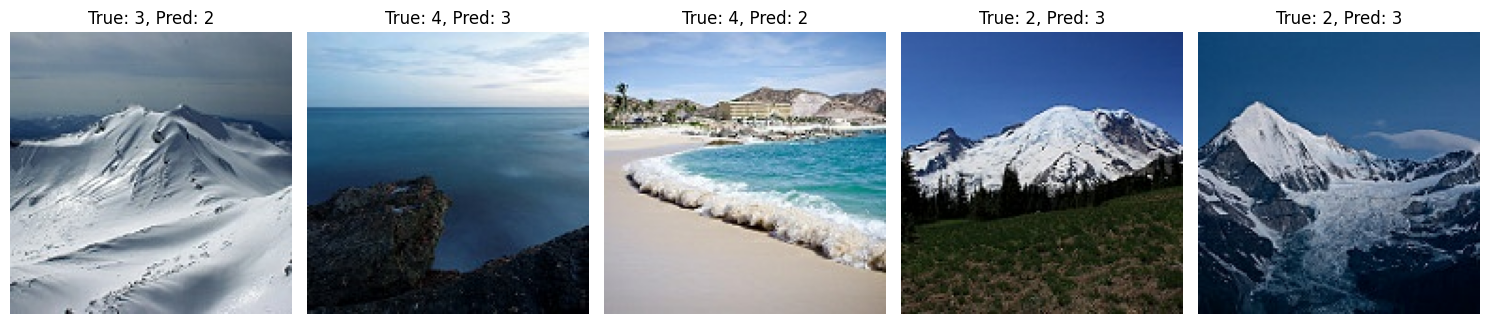

In [308]:
import numpy as np
import matplotlib.pyplot as plt

def plot_misclassified_images(images, labels, predictions, collected_images, num_images=5):
    # Convert images and labels to numpy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Find indices of misclassified images (where predictions are incorrect)
    misclassified_indices = np.where(labels != predictions)[0]
    
    # Collect misclassified images and their labels/predictions
    for index in misclassified_indices:
        if len(collected_images['images']) < num_images:
            # Reverse normalization (assuming images are normalized between 0 and 1)
            original_image = images[index] * 255.0
            original_image = np.clip(original_image, 0, 255).astype("uint8")
            collected_images['images'].append(original_image)
            collected_images['true_labels'].append(labels[index])
            collected_images['pred_labels'].append(predictions[index])

        if len(collected_images['images']) >= num_images:
            break  # Stop collecting once we have enough images

def show_misclassified_images(collected_images, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)  # Create a row with num_images columns
        
        plt.imshow(collected_images['images'][i])
        plt.title(f"True: {collected_images['true_labels'][i]}, Pred: {collected_images['pred_labels'][i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming test_dataset is a tf.data.Dataset object
collected_images = {
    'images': [],
    'true_labels': [],
    'pred_labels': []
}

for images, labels in test_dataset:
    predictions = model3.predict(images)  # Get the model's predictions
    predictions = np.argmax(predictions, axis=1)  # Get the predicted class index
    
    # Collect misclassified images across batches
    plot_misclassified_images(images, labels, predictions, collected_images, num_images=5)
    
    # Stop if we've collected enough misclassified images
    if len(collected_images['images']) >= 5:
        break

# Show the collected misclassified images
show_misclassified_images(collected_images, num_images=5)


3.2

In [265]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Load MobileNet pre-trained on ImageNet, excluding the top layers
base_model = MobileNet(
    weights='imagenet',         # Load pre-trained weights
    include_top=False,          # Exclude top fully-connected layers
    input_shape=(150, 150, 3)   # Input shape for your data
)

# Freeze the base model's weights to prevent them from being updated during training
base_model.trainable = False

# Create a new model on top of MobileNet
model_mobilenet = Sequential()
model_mobilenet.add(base_model)                       # Add MobileNet as base
model_mobilenet.add(GlobalAveragePooling2D())         # Global average pooling layer
model_mobilenet.add(Dense(512, activation='relu'))    # Fully connected layer
model_mobilenet.add(Dropout(0.5))                     # Dropout layer to prevent overfitting
model_mobilenet.add(Dense(6, activation='softmax'))   # Output layer for classification

# Compile the model
model_mobilenet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_mobilenet.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 6)                 3078      
                                                                 
Total params: 3756742 (14.33 MB)
Trainable params: 527

In [267]:
# Define early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history_mobilenet = model_mobilenet.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)


Epoch 1/2
351/351 [==============================] - 289s 823ms/step - loss: 0.4039 - accuracy: 0.8631 - val_loss: 0.2995 - val_accuracy: 0.8902
Epoch 2/2
351/351 [==============================] - 291s 830ms/step - loss: 0.2591 - accuracy: 0.9075 - val_loss: 0.2528 - val_accuracy: 0.9063


In [268]:
test_loss, test_accuracy = model_mobilenet.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

94/94 [==============================] - 24s 250ms/step - loss: 0.2256 - accuracy: 0.9180
Test Loss: 0.2256
Test Accuracy: 0.9180


In [309]:
import numpy as np

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model_mobilenet(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


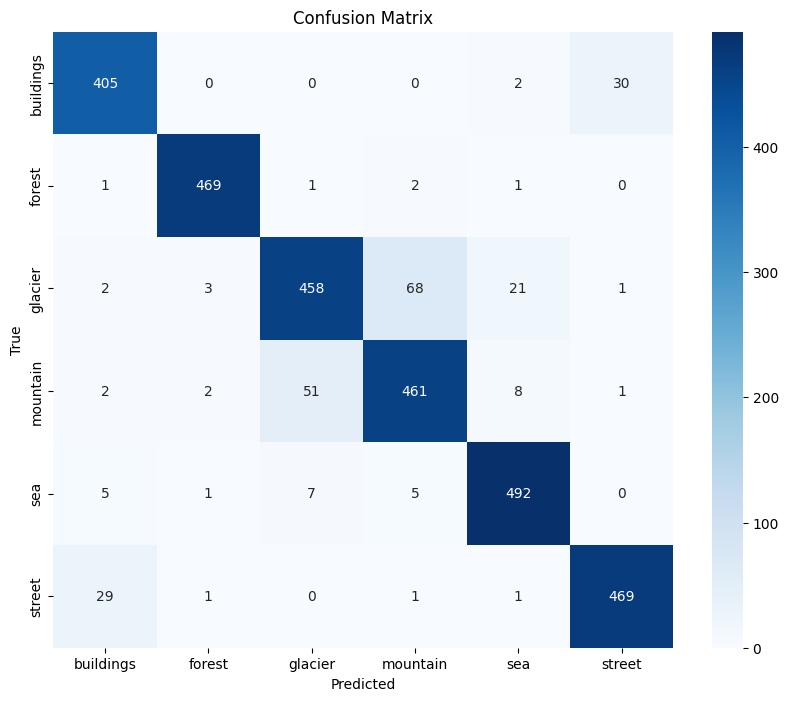

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.class_names, yticklabels=dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [312]:
# Calculate misclassifications per class
misclassifications = np.zeros_like(cm)
for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        misclassifications[y_true[i], y_pred[i]] += 1

# Find the class with the most errors
most_common_error_class = np.argmax(np.sum(misclassifications, axis=1))
print(f"Most common classification error is for class: {dataset.class_names[most_common_error_class]}")


Most common classification error is for class: glacier


1/1 [==============================] - 0s 262ms/step


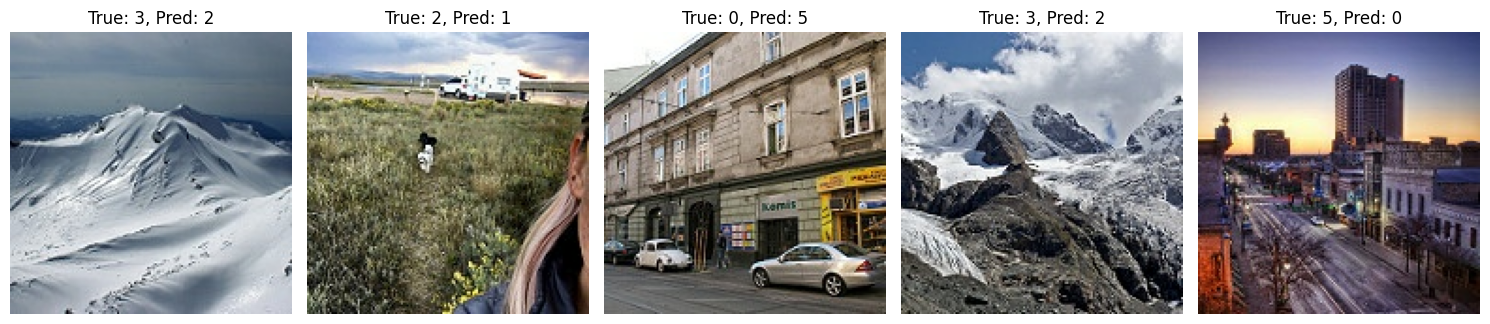

In [299]:
import numpy as np
import matplotlib.pyplot as plt

def plot_misclassified_images(images, labels, predictions, collected_images, num_images=5):
    # Convert images and labels to numpy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Find indices of misclassified images (where predictions are incorrect)
    misclassified_indices = np.where(labels != predictions)[0]
    
    # Collect misclassified images and their labels/predictions
    for index in misclassified_indices:
        if len(collected_images['images']) < num_images:
            # Reverse normalization (assuming images are normalized between 0 and 1)
            original_image = images[index] * 255.0
            original_image = np.clip(original_image, 0, 255).astype("uint8")
            collected_images['images'].append(original_image)
            collected_images['true_labels'].append(labels[index])
            collected_images['pred_labels'].append(predictions[index])

        if len(collected_images['images']) >= num_images:
            break  # Stop collecting once we have enough images

def show_misclassified_images(collected_images, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)  # Create a row with num_images columns
        
        plt.imshow(collected_images['images'][i])
        plt.title(f"True: {collected_images['true_labels'][i]}, Pred: {collected_images['pred_labels'][i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming test_dataset is a tf.data.Dataset object
collected_images = {
    'images': [],
    'true_labels': [],
    'pred_labels': []
}

for images, labels in test_dataset:
    predictions = model_mobilenet.predict(images)  # Get the model's predictions
    predictions = np.argmax(predictions, axis=1)  # Get the predicted class index
    
    # Collect misclassified images across batches
    plot_misclassified_images(images, labels, predictions, collected_images, num_images=5)
    
    # Stop if we've collected enough misclassified images
    if len(collected_images['images']) >= 5:
        break

# Show the collected misclassified images
show_misclassified_images(collected_images, num_images=5)


3.3:
mobilenet was comparatively better compared to convolutional network as it was pretrained. it had a test accuracy of 91 when compared to 93 by convolutional network.
both the models misidentified glaciers.
the confusion matrix and details are computed above